In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import csv

flights = pd.read_csv('flights_final.csv', sep="\t", quoting=csv.QUOTE_ALL)

FileNotFoundError: [Errno 2] No such file or directory: 'flights_final.csv'

In [2]:
flights

,index,Date (MM/DD/YYYY),File,Gtype,Flight Time,Start Time,End Time,Landing,Start_Alt (ft MSL),Max Altitude (ft MSL/ft AGL),...,distance_traveled_during_window (miles),terrain_label_at_first_engine_event,avg_speed_during_pre_event_window (knots),std_dev_speed_during_pre_event_window (knots),avg_speed_during_post_event_window (knots),engine_run_times (s),height_gain_loss (ft),terrain_elev_at_first_engine_event (ft),dynamic_AGL_at_first_engine_event (ft),Engine_Start_Above_1000ft
0,1,03/12/2016,2016-03-12-CNI-21J-01.IGC,LAK17BFES,3:11:16,171318,202434,HOME,114,4967[4840],...,5.074177,"Open Forest, Other",56.65,10.03,60.78,"[60, 420, 60, 480, 300, 180, 60, 60, 420, 480,...","[154, 210, -89, 318, -1105, 125, -105, -181, 1...",125.31,2551.86,True
1,2,06/25/2024,46PGA9D1.IGC,Ventus3M18m,4:31:17,184736,231853,HOME,3694,12821[8793],...,7.166436,Herbaceous vegetation,74.73,10.91,63.95,[600],[3743],4088.87,678.19,False
2,4,03/11/2014,43BG8FH1.IGC,Unknown,4:45:38,164720,213258,HOME,121,3795[3700],...,0.101798,Herbaceous vegetation,3.70,9.04,54.48,[120],[1266],112.02,-102.18,False
3,5,06/17/2018,2018-06-17-CNI-27X-01.IGC,DG80015,2:47:12,183443,212155,HOME,5009,14642[8914],...,0.125748,Herbaceous vegetation,9.55,6.67,49.24,[420],[2890],5003.28,-55.77,False
4,6,08/15/2023,2023-08-15-CNI-25N-01.IGC,ASH31mi,3:43:47,173705,212052,HOME,948,9192[7336],...,0.070698,Shrubs,11.64,10.89,56.23,[360],[2234],932.41,-72.83,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,2050,03/12/2016,63CV7H21.igc,ArcusM,2:17:00,175045,200745,HOME,104,4809[4675],...,4.466952,"Open Forest, Other",44.85,13.77,63.68,[60],[571],149.78,1822.00,True
1736,2051,03/11/2018,83BV6TG1.igc,HpH304M,3:14:57,165106,200603,HOME,137,4153[4019],...,0.067522,"Closed Forest, Other",1.40,5.03,55.11,[240],[1975],110.56,4.27,False
1737,2052,08/10/2023,38AV8101.igc,Discus2,4:35:48,175643,223231,HOME,298,6312[5965],...,8.300521,"Open Forest, Other",86.26,22.49,57.55,[120],[571],318.41,2220.96,True
1738,2053,05/21/2023,35LVAGM1.igc,ASW27B,2:57:17,172550,202307,HOME,1236,7595[6496],...,0.097236,Herbaceous vegetation,3.07,7.39,53.22,[240],[2120],1251.57,-96.71,False


In [8]:
df = flights

df.columns = df.columns.str.strip()

required_columns = [
    'dynamic_AGL_at_first_engine_event (ft)',
    'terrain_elev_at_first_engine_event (ft)',
    'Start_Alt (ft MSL)',
    'Engine_Start_Above_1000ft'
]

missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

df['dynamic_AGL_at_first_engine_event (ft)'] = pd.to_numeric(df['dynamic_AGL_at_first_engine_event (ft)'], errors='coerce')
df['terrain_elev_at_first_engine_event (ft)'] = pd.to_numeric(df['terrain_elev_at_first_engine_event (ft)'], errors='coerce')
df['Start_Alt (ft MSL)'] = pd.to_numeric(df['Start_Alt (ft MSL)'], errors='coerce')

df['computed_dynamic_AGL (ft)'] = df['Start_Alt (ft MSL)'] - df['terrain_elev_at_first_engine_event (ft)']
df['AGL_consistency_check'] = abs(df['dynamic_AGL_at_first_engine_event (ft)'] - df['computed_dynamic_AGL (ft)']) < 10  
inconsistent_agl = df[~df['AGL_consistency_check']]

df['logical_check'] = df.apply(lambda x: (x['dynamic_AGL_at_first_engine_event (ft)'] >= 1000) if x['Engine_Start_Above_1000ft'] else True, axis=1)
logical_issues = df[~df['logical_check']]

print(f"Total records: {len(df)}")
print(f"Inconsistent AGL records: {len(inconsistent_agl)}")
print(f"Logical check failures: {len(logical_issues)}")






Total records: 1740
Inconsistent AGL records: 1663
Logical check failures: 0


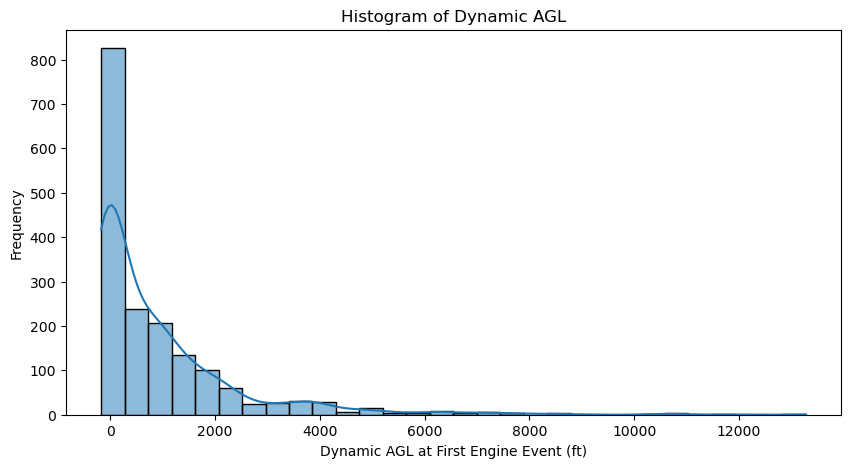

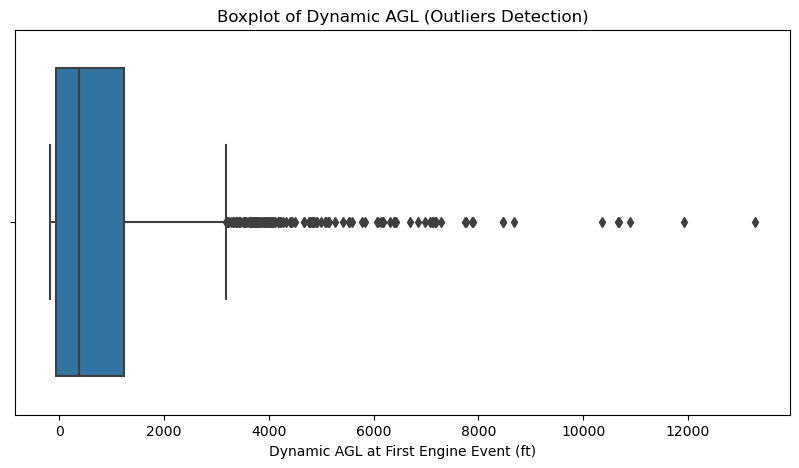

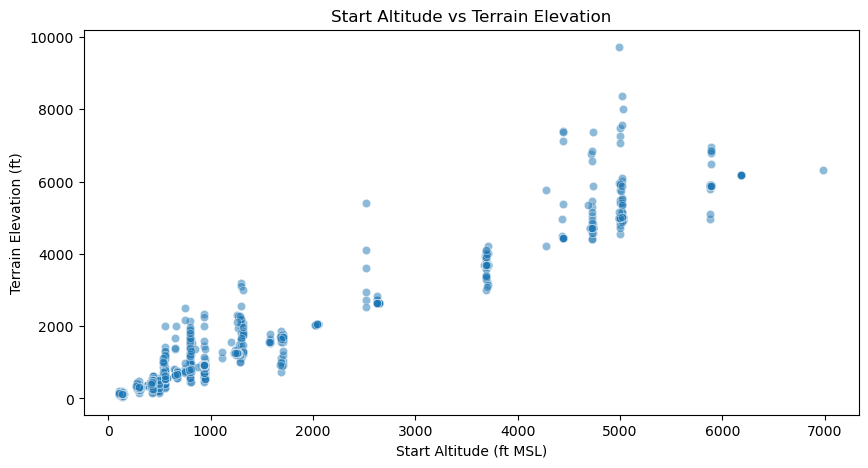

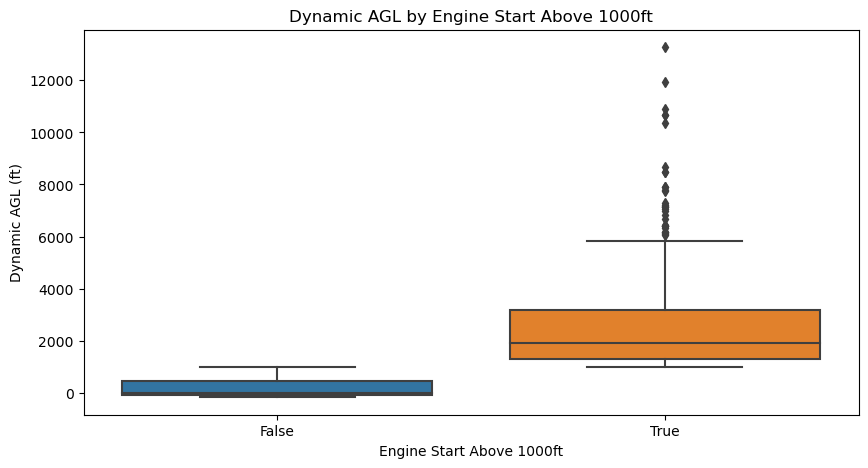

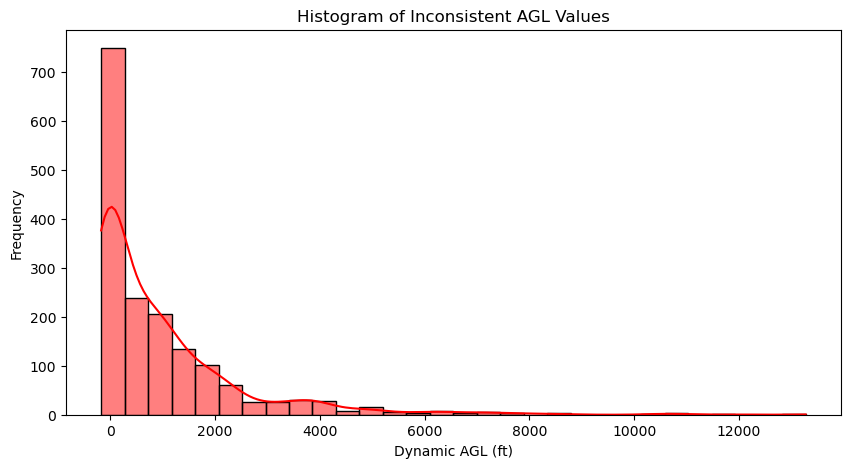

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

df = flights

df.columns = df.columns.str.strip()

required_columns = [
    'dynamic_AGL_at_first_engine_event (ft)',
    'terrain_elev_at_first_engine_event (ft)',
    'Start_Alt (ft MSL)',
    'Engine_Start_Above_1000ft'
]

missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {missing_cols}")

df['dynamic_AGL_at_first_engine_event (ft)'] = pd.to_numeric(df['dynamic_AGL_at_first_engine_event (ft)'], errors='coerce')
df['terrain_elev_at_first_engine_event (ft)'] = pd.to_numeric(df['terrain_elev_at_first_engine_event (ft)'], errors='coerce')
df['Start_Alt (ft MSL)'] = pd.to_numeric(df['Start_Alt (ft MSL)'], errors='coerce')

df['computed_dynamic_AGL (ft)'] = df['Start_Alt (ft MSL)'] - df['terrain_elev_at_first_engine_event (ft)']
df['AGL_consistency_check'] = abs(df['dynamic_AGL_at_first_engine_event (ft)'] - df['computed_dynamic_AGL (ft)']) < 10  
df['logical_check'] = df.apply(lambda x: (x['dynamic_AGL_at_first_engine_event (ft)'] >= 1000) if x['Engine_Start_Above_1000ft'] else True, axis=1)

# 1. Histogram of Dynamic AGL
plt.figure(figsize=(10,5))
sns.histplot(df['dynamic_AGL_at_first_engine_event (ft)'].dropna(), bins=30, kde=True)
plt.xlabel('Dynamic AGL at First Engine Event (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Dynamic AGL')
plt.show()

# 2. Boxplot for Outliers
plt.figure(figsize=(10,5))
sns.boxplot(x=df['dynamic_AGL_at_first_engine_event (ft)'])
plt.xlabel('Dynamic AGL at First Engine Event (ft)')
plt.title('Boxplot of Dynamic AGL (Outliers Detection)')
plt.show()

# 3. Scatter Plot of Start Altitude vs Terrain Elevation
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Start_Alt (ft MSL)'], y=df['terrain_elev_at_first_engine_event (ft)'], alpha=0.5)
plt.xlabel('Start Altitude (ft MSL)')
plt.ylabel('Terrain Elevation (ft)')
plt.title('Start Altitude vs Terrain Elevation')
plt.show()

# 4. Bar Plot of Engine Start Above 1000ft vs. Dynamic AGL
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Engine_Start_Above_1000ft'], y=df['dynamic_AGL_at_first_engine_event (ft)'])
plt.xlabel('Engine Start Above 1000ft')
plt.ylabel('Dynamic AGL (ft)')
plt.title('Dynamic AGL by Engine Start Above 1000ft')
plt.show()

# 5. Histogram of Inconsistencies
plt.figure(figsize=(10,5))
sns.histplot(df[~df['AGL_consistency_check']]['dynamic_AGL_at_first_engine_event (ft)'], bins=30, color='red', kde=True)
plt.xlabel('Dynamic AGL (ft)')
plt.ylabel('Frequency')
plt.title('Histogram of Inconsistent AGL Values')
plt.show()
